In [50]:
import keras
from keras import layers

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data() 
y_test, y_train = y_test.ravel(), y_train.ravel()
X_train.shape, y_train.shape, X_test.shape, y_test.shape   

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [51]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

labels_dict = {i: label for i, label in enumerate(labels)}

In [52]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

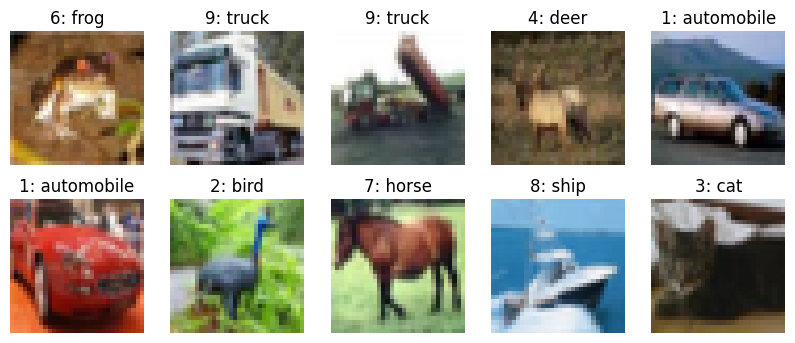

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title(f'{y_train[i]}: {labels[y_train[i]]}')
plt.show()  

In [54]:
scaled_X_train = X_train.astype('float32') / 255
scaled_X_test = X_test.astype('float32') / 255

In [55]:
from keras import layers

def CNN_model(learning_rate = 0.001, drop_rate = 0.5, kernels = [32, 64, ]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = keras.Sequential(name='CNN')

    for kern in kernels:
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation='relu', kernel_initializer='he_normal',
                                   input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
    return model

In [56]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor='val_loss', mode="min", patience=15)

model.fit(scaled_X_train, y_train, validation_split=0.2, epochs=30, callbacks=[early_stopper])

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.2315 - loss: 2.0459 - val_accuracy: 0.4499 - val_loss: 1.5404
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4063 - loss: 1.6017 - val_accuracy: 0.4898 - val_loss: 1.4172
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.4608 - loss: 1.4638 - val_accuracy: 0.5476 - val_loss: 1.2578
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.5040 - loss: 1.3684 - val_accuracy: 0.5721 - val_loss: 1.2048
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.5337 - loss: 1.2800 - val_accuracy: 0.6031 - val_loss: 1.1384
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5538 - loss: 1.2313 - val_accuracy: 0.5989 - val_loss: 1.1098
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5702 - loss: 1.1805 - val_accuracy: 0.6248 - val_loss: 1.0537
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5845 -

In [58]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics 

,accuracy,loss,val_accuracy,val_loss
0,0.297625,1.867567,0.4499,1.540399
1,0.425175,1.556366,0.4898,1.417221
2,0.472775,1.434695,0.5476,1.257815
3,0.508100,1.349471,0.5721,1.204849
4,0.536750,1.274632,0.6031,1.138383
5,0.556925,1.224159,0.5989,1.109788
6,0.571700,1.180095,0.6248,1.053744
7,0.582600,1.148286,0.6340,1.044010
8,0.601050,1.108595,0.6466,1.000368
9,0.609225,1.089759,0.6271,1.028742


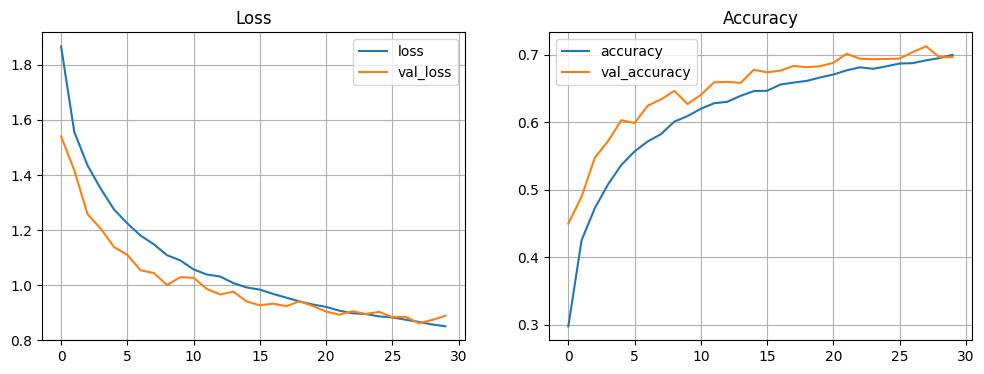

In [59]:
def plot_metrics(metrics):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    metrics[['loss', 'val_loss']].plot(ax = ax[0], title='Loss', grid=True)
    metrics[['accuracy', 'val_accuracy']].plot(ax = ax[1], title='Accuracy', grid=True)
    plt.show()

plot_metrics(metrics)

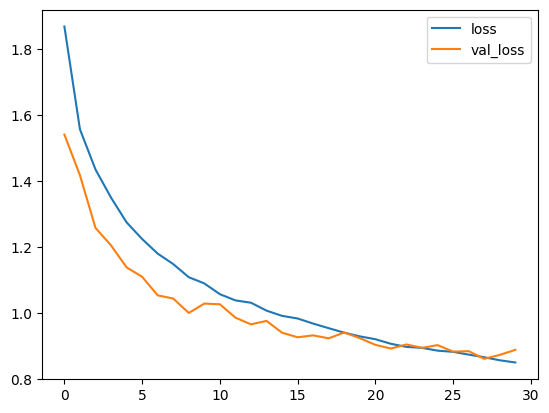

In [60]:
# plot metrics
metrics[['loss', 'val_loss']].plot()
plt.show()

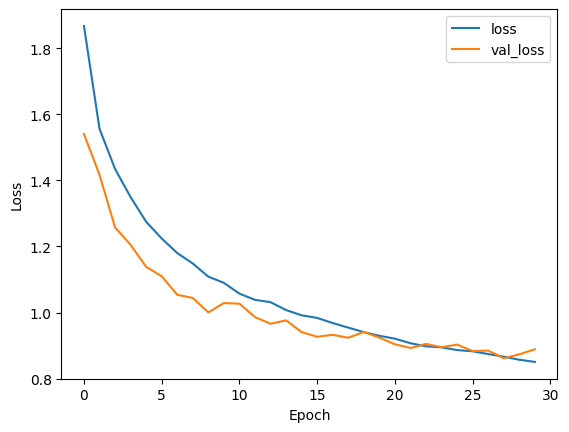

In [64]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [66]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the training and validation loss history
history_data = {
    'Epoch': list(range(1, len(model.history.history['loss']) + 1)),
    'Loss': model.history.history['loss'],
    'Validation Loss': model.history.history['val_loss']
}

history_df = pd.DataFrame(history_data)

# Create the plot using Plotly Express
fig = px.line(history_df, x='Epoch', y=['Loss', 'Validation Loss'], 
              labels={'Epoch': 'Epoch', 'value': 'Loss'}, 
              title="Loss vs Epochs")
fig.update_layout(
    legend_title="Loss Type",
    xaxis_title="Epoch",
    yaxis_title="Loss"
)

# Show the plot
fig.show()

In [69]:
early_stopper = EarlyStopping(monitor='val_loss', mode="min", patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train,
              y_train,
              validation_split=1/6,
              epochs=20,
              callbacks=[early_stopper])
    metrics = pd.DataFrame(model.history.history)
    
    val_acc = metrics['val_accuracy'].iloc[-1]
    return val_acc

In [70]:
import numpy as np
np.arange(0.1, 0.6, 0.1)

dropout_accuracies = {}
for drop_rate in np.arange(0.1, 0.6, 0.1):
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.4033 - loss: 1.6730 - val_accuracy: 0.5660 - val_loss: 1.2574
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.6072 - loss: 1.1115 - val_accuracy: 0.6422 - val_loss: 1.0367
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.6806 - loss: 0.9254 - val_accuracy: 0.6596 - val_loss: 0.9857
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7274 - loss: 0.7823 - val_accuracy: 0.6794 - val_loss: 0.9424
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.7820 - loss: 0.6321 - val_accuracy: 0.6911 - val_loss: 0.9290
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.8163 - loss: 0.5236 - val_accuracy: 0.6963 - val_loss: 0.9486
Epoch 7/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.8576 - loss: 0.4149 - val_accuracy: 0.6917 - val_loss: 1.0149
Epoch 8/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.8862 -

<Axes: title={'center': 'Tuning Dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

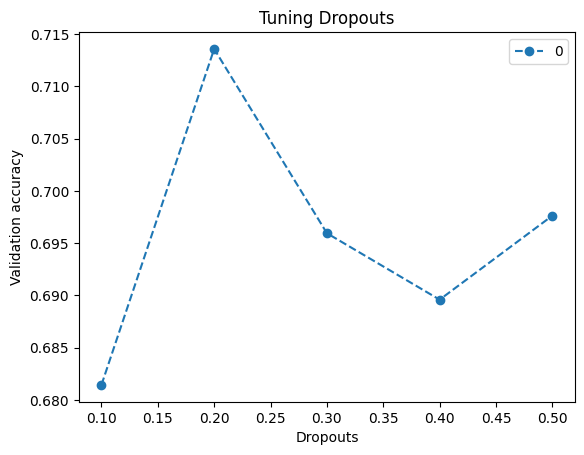

In [71]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title='Tuning Dropouts', xlabel="Dropouts", ylabel="Validation accuracy",style="--o")

In [72]:
model_final = CNN_model(drop_rate=0.2)

model_final.fit(scaled_X_train, y_train, epochs=20)

c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 38ms/step - accuracy: 0.4274 - loss: 1.5923
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.6400 - loss: 1.0270
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7040 - loss: 0.8503
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7453 - loss: 0.7288
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7808 - loss: 0.6242
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8187 - loss: 0.5234
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8456 - loss: 0.4441
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8657 - loss: 0.3822
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8841 - loss: 0.3292
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9000 - loss: 0.2882
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9127 - loss: 0.2478
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1000
           1       0.90      0.74      0.81      1000
           2       0.62      0.58      0.60      1000
           3       0.57      0.48      0.52      1000
           4       0.69      0.60      0.64      1000
           5       0.66      0.61      0.63      1000
           6       0.66      0.82      0.73      1000
           7       0.73      0.73      0.73      1000
           8       0.72      0.85      0.78      1000
           9       0.67      0.88      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

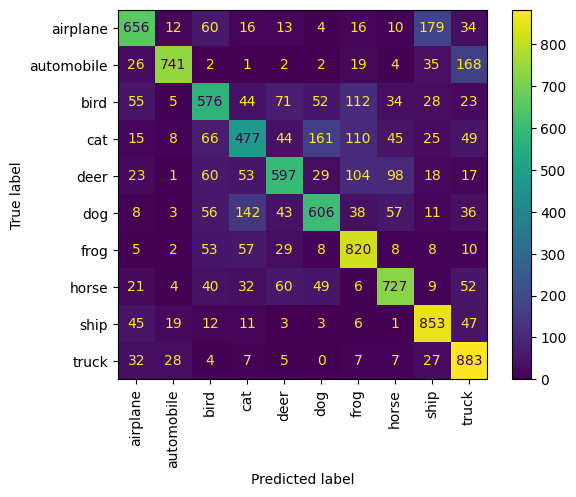

In [73]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(scaled_X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90)